In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint

In [2]:
R = 0.4 # Minimum euclidean distance to keep between a human and a robot
N = 20 # Number of steps to consider in discretization
M = 0.1 # Maximum speed

In [3]:
def human(t):
    if t >= 10:
        return (2, 0.5)
    else:
        return (0.1 * t, 0.5)

In [4]:
robot = lambda x: (0.5, x)

In [5]:
euclidean = lambda x1, y1, x2, y2: np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [6]:
t = lambda x, v, i: np.sum(np.diff(x[:i + 1]) / v[:i])

In [7]:
f = lambda v, x: t(x, v, N) / 10000 # https://stackoverflow.com/a/36685019

In [8]:
x = np.linspace(0, 1, N + 1)
v = np.ones(N) * 0.1

In [9]:
human(t(x, v, 10))

(0.5, 0.5)

In [10]:
robot(x[10])

(0.5, 0.5)

In [11]:
g = lambda i: lambda v: euclidean(*human(t(x, v, i)), *robot(x[i]))

In [12]:
nlc = [NonlinearConstraint(g(i), R, np.Inf) for i in range(N + 1)]

In [13]:
h = lambda i: np.append(np.append(np.zeros(i), np.ones(1)), np.zeros(N - i - 1))

In [14]:
# lc = [LinearConstraint(h(i), 0, 0.2) for i in range(N)]

In [15]:
# cons = nlc + lc
cons = nlc

In [16]:
results = minimize(f, np.ones(N) * 0.01, bounds=[(0, M) for i in range(N)], constraints=cons, args=x)
results

     fun: 0.0015650151500346723
     jac: array([-0.01412037, -0.01412029, -0.00640521, -0.00059258, -0.0005041 ,
       -0.0005    , -0.0005    , -0.0005    , -0.0005    , -0.0005    ,
       -0.0005    , -0.0005    , -0.0005    , -0.0005    , -0.0005    ,
       -0.0005    , -0.0005    , -0.0005    , -0.0005    , -0.0005    ])
 message: 'Optimization terminated successfully.'
    nfev: 242
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.01881749, 0.01881755, 0.02793947, 0.09185681, 0.09959245,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ])

In [17]:
def plot(v):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.ylim(0, np.sqrt(2))
    plt.plot([i for i in range(N + 1)], [cons[i].fun(v) for i in range(N + 1)])
    plt.axhline(R, color='r')
    plt.subplot(2, 1, 2)
    plt.plot([t(x, v, i) for i in range(N + 1)], x)

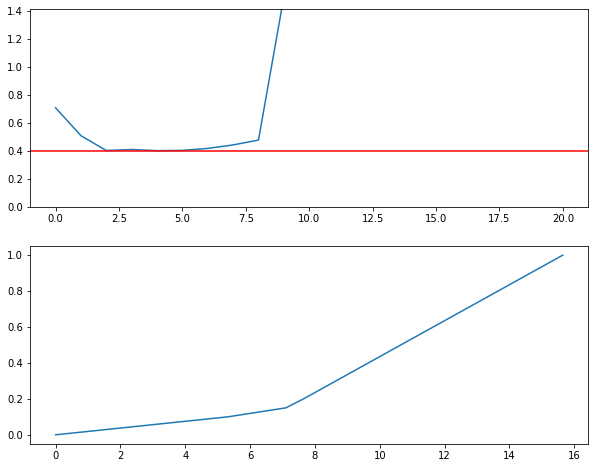

In [18]:
plot(results.x)

In [19]:
print('Time taken to complete path:', t(x, results.x, N))

Time taken to complete path: 15.650151500346723
